# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [14]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('/content/train_house.csv')

# Display first few rows and dataset
print(house.head())
print(house.info())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [16]:
# Drop variabel NaN
# Drop rows with NaN values
house_cleaned = house.dropna()

# Display info after cleaning
print(house_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             0 non-null      int64  
 1   MSSubClass     0 non-null      int64  
 2   MSZoning       0 non-null      object 
 3   LotFrontage    0 non-null      float64
 4   LotArea        0 non-null      int64  
 5   Street         0 non-null      object 
 6   Alley          0 non-null      object 
 7   LotShape       0 non-null      object 
 8   LandContour    0 non-null      object 
 9   Utilities      0 non-null      object 
 10  LotConfig      0 non-null      object 
 11  LandSlope      0 non-null      object 
 12  Neighborhood   0 non-null      object 
 13  Condition1     0 non-null      object 
 14  Condition2     0 non-null      object 
 15  BldgType       0 non-null      object 
 16  HouseStyle     0 non-null      object 
 17  OverallQual    0 non-null      int64  
 18  OverallCond    0 non-null  

In [17]:
# Memisahkan data menjadi numerikal & kategorikal
numerical_data = house_cleaned.select_dtypes(include=['int64', 'float64'])
categorical_data = house_cleaned.select_dtypes(include=['object'])

print("Kolom Numerikal:", numerical_data.columns)
print("Kolom Kategorikal:", categorical_data.columns)

Kolom Numerikal: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Kolom Kategorikal: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',

# 1D Visualization

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual`

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut

       AllPub	All public Utilities (E,G,W,& S)
       NoSeWa	Electricity and Gas Only

Text(0.5, 1.0, 'Utilities')

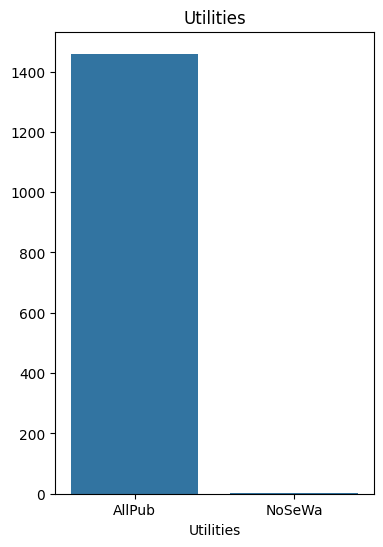

In [34]:
### Tulis kode Anda di sini
# Barplot untuk Utilities
# Variabel Kategorikal: Utilities, HouseStyle, ExterQual
plt.figure(figsize=(14, 6))

# Plot Utilities
plt.subplot(1, 3, 1)
sns.barplot(x=house['Utilities'].value_counts().index, y=house['Utilities'].value_counts().values)
plt.title('Utilities')

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

Text(0.5, 1.0, 'HouseStyle')

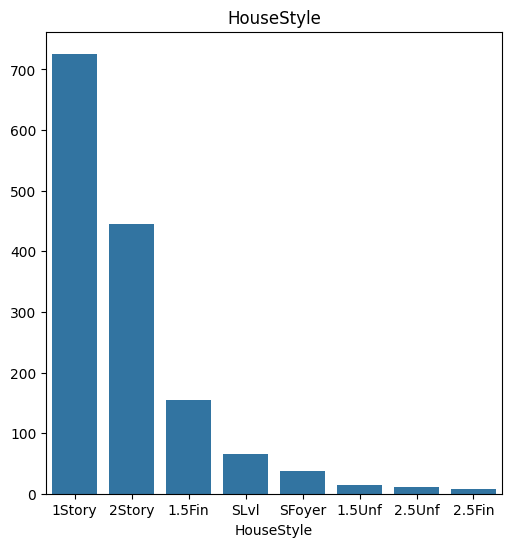

In [39]:
# Plot HouseStyle
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 2)
sns.barplot(x=house['HouseStyle'].value_counts().index, y=house['HouseStyle'].value_counts().values)
plt.title('HouseStyle')

### ExterQual

ExterQual: Kualitas material eksterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

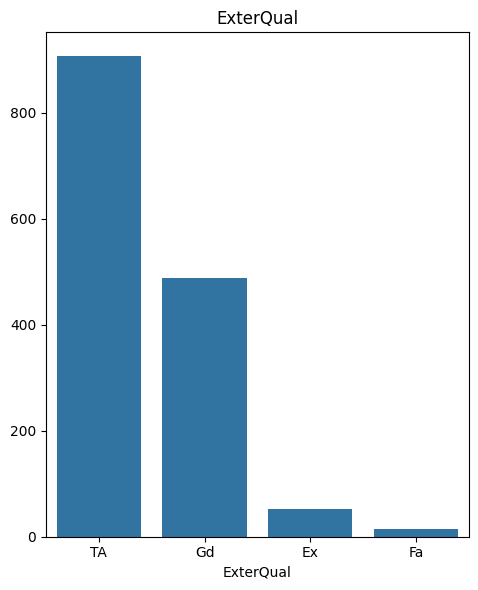

In [37]:
# Plot ExterQual
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 3)
sns.barplot(x=house['ExterQual'].value_counts().index, y=house['ExterQual'].value_counts().values)
plt.title('ExterQual')

plt.tight_layout()
plt.show()

#### **Analisis tentang variabel kategorikal**

- **Utilities**: Mayoritas properti menggunakan `AllPub`, dengan sedikit yang menggunakan `NoSeWa`. Ini mungkin menunjukkan bahwa properti yang lebih berkembang lebih umum di dataset ini.
- **HouseStyle**: Tipe rumah `2Story` dan `1Story` lebih sering muncul, mungkin mencerminkan preferensi desain rumah yang umum.
- **ExterQual**: Sebagian besar properti memiliki kualitas eksterior `TA` atau `Gd`, menunjukkan bahwa sebagian besar properti dijaga dengan baik.

**Pertanyaan**: Bagaimana pengaruh faktor-faktor seperti tipe rumah dan kualitas eksterior terhadap harga properti? *]

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

Statistik untuk variabel numerikal:
            SalePrice
mean    180921.195890
median  163000.000000
std      79442.502883


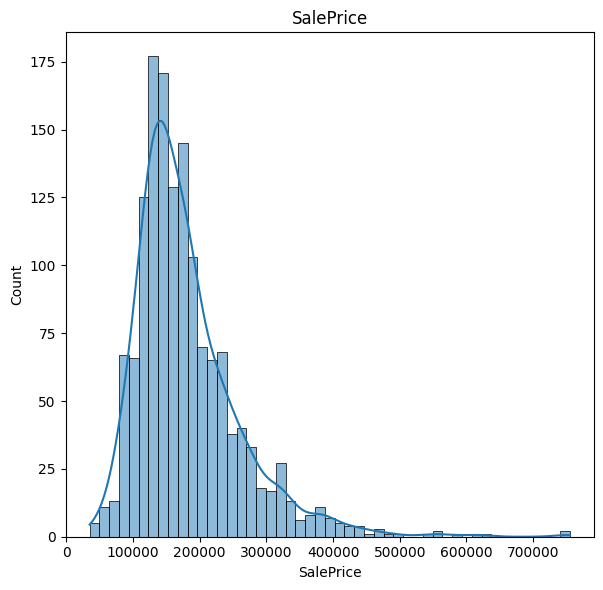

In [47]:
# Hitung statistik (mean, median, std) untuk SalePrice
stats_numerical = house[['SalePrice']].agg(['mean', 'median', 'std'])

# Tampilkan statistik
print("Statistik untuk variabel numerikal:")
print(stats_numerical)

# Visualisasi histogram
plt.figure(figsize=(17, 6))

# Plot SalePrice
plt.subplot(1, 3, 1)
sns.histplot(house['SalePrice'], kde=True)
plt.title('SalePrice')
plt.tight_layout()
plt.show()

#### **Analisis tentang variabel `SalePrice`**

- **SalePrice**: Variabel SalePrice menunjukkan harga jual rumah. Distribusi datanya miring ke kanan (positively skewed). Ini berarti sebagian besar rumah dijual dengan harga yang relatif rendah, namun ada beberapa rumah dengan harga jual yang sangat tinggi yang menarik rata-rata harga ke atas. Fenomena ini umum terjadi di pasar properti, di mana adanya beberapa properti mewah atau dengan lokasi sangat strategis dapat mempengaruhi harga rata-rata secara signifikan.
  - Apa faktor utama yang membedakan rumah dengan harga tinggi dan rendah? Apakah ukuran rumah atau lokasi mempengaruhi harga jual secara signifikan?

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

Statistik untuk variabel numerikal:
          GrLivArea
mean    1515.463699
median  1464.000000
std      525.480383


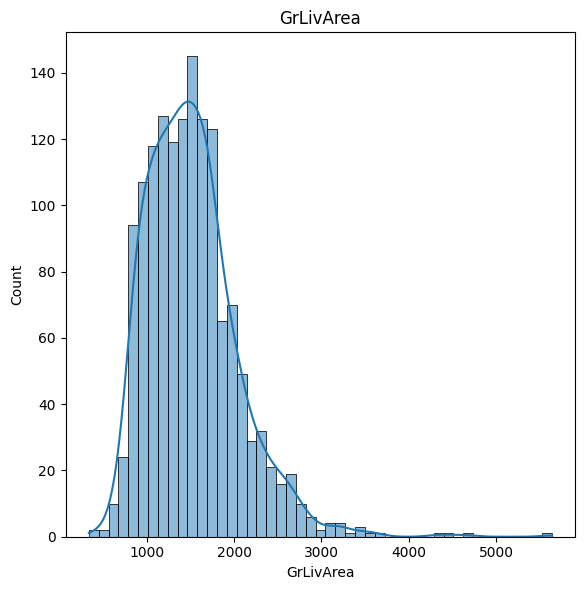

In [48]:
# Plot GrLivArea
# Hitung statistik (mean, median, std) untuk GrLivArea
stats_numerical = house[['GrLivArea']].agg(['mean', 'median', 'std'])

# Tampilkan statistik
print("Statistik untuk variabel numerikal:")
print(stats_numerical)

# Visualisasi histogram
plt.figure(figsize=(17, 6))
plt.subplot(1, 3, 2)
sns.histplot(house['GrLivArea'], kde=True)
plt.title('GrLivArea')
plt.tight_layout()
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

### Analisis tentang variabel `GrLivArea`

- **GrLivArea**: Variabel ini menunjukkan luas area tinggal di atas permukaan tanah dalam satuan square feet (tidak termasuk basement). Dari histogram yang ditampilkan, distribusinya menunjukkan bentuk distribusi normal yang cenderung simetris dengan puncak pada sekitar 1000 hingga 2000 square feet. Ini menunjukkan bahwa sebagian besar rumah dalam dataset memiliki luas area tinggal yang berada dalam kisaran tersebut.
  - **Pertanyaan**: Apakah ukuran area tinggal berhubungan langsung dengan harga rumah? Apakah rumah dengan luas area yang lebih besar cenderung lebih mahal?

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

Statistik untuk variabel numerikal:
        GarageArea
mean    472.980137
median  480.000000
std     213.804841


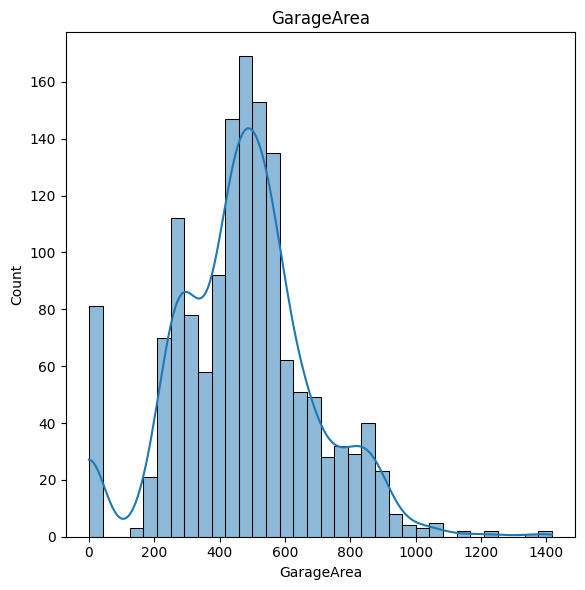

In [61]:
# Plot PoolArea
# Hitung statistik (mean, median, std) untuk PoolArea
stats_numerical = house[['GarageArea']].agg(['mean', 'median', 'std'])

# Tampilkan statistik
print("Statistik untuk variabel numerikal:")
print(stats_numerical)

# Visualisasi histogram
plt.figure(figsize=(17, 6))
plt.subplot(1, 3, 3)
sns.histplot(house['GarageArea'], kde=True)
plt.title('GarageArea')
plt.tight_layout()
plt.show()

### Analisis tentang variabel `GarageArea`

- **GarageArea**: Variabel ini menunjukkan luas garasi dalam satuan square feet. Dari histogram yang ditampilkan, dapat dilihat bahwa distribusinya cukup miring ke kanan, dengan sebagian besar data terkonsentrasi pada kisaran 400 hingga 600 square feet. Terdapat beberapa nilai ekstrim pada sisi kanan yang bisa jadi mencerminkan rumah dengan garasi besar.
  - **Pertanyaan**: Apa pengaruh ukuran garasi terhadap harga jual rumah? Apakah rumah dengan garasi lebih besar cenderung memiliki harga yang lebih tinggi?#### **Analisis tentang variabel `GarageArea`**

## Pemrosesan Data Variabel Numerikal

In [55]:
# Transformasi log-10 SalePrice
# Transformasi log-10 pada variabel numerikal
house['log_SalePrice'] = np.log10(house['SalePrice'])
# Statistik untuk variabel asli dan hasil transformasi log
stats_original = house[['SalePrice']].describe().transpose()[['mean', '50%', 'std']]
stats_log = house[['log_SalePrice']].describe().transpose()[['mean', '50%', 'std']]
print("Statistics (Original Data):")
print(stats_original)
print("\nStatistics (Log-Transformed Data):")
print(stats_log)

Statistics (Original Data):
                   mean       50%           std
SalePrice  180921.19589  163000.0  79442.502883

Statistics (Log-Transformed Data):
                   mean       50%      std
log_SalePrice  5.221979  5.212188  0.17348


In [56]:
# Transformasi log-10 GrLivArea
### Tulis kode Anda di sini
house['log_GrLivArea'] = np.log10(house['GrLivArea'])
# Statistik untuk variabel asli dan hasil transformasi log
stats_original1 = house[['GrLivArea']].describe().transpose()[['mean', '50%', 'std']]
stats_log = house[['log_GrLivArea']].describe().transpose()[['mean', '50%', 'std']]
print("Statistics (Original Data):")
print(stats_original)
print("\nStatistics (Log-Transformed Data):")
print(stats_log)

Statistics (Original Data):
                   mean       50%           std
SalePrice  180921.19589  163000.0  79442.502883

Statistics (Log-Transformed Data):
                   mean       50%       std
log_GrLivArea  3.156354  3.165541  0.144859


In [57]:
# Menghilangkan nilai nol pada GarageArea
### Tulis kode Anda di sini
numerical_data['GarageArea'] = numerical_data['GarageArea'].replace(0, np.nan)

#### **Penjelasan dan analisis tentang pemrosesan data**

* [*tulis penjelasan dan analisis Anda di sini*]

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

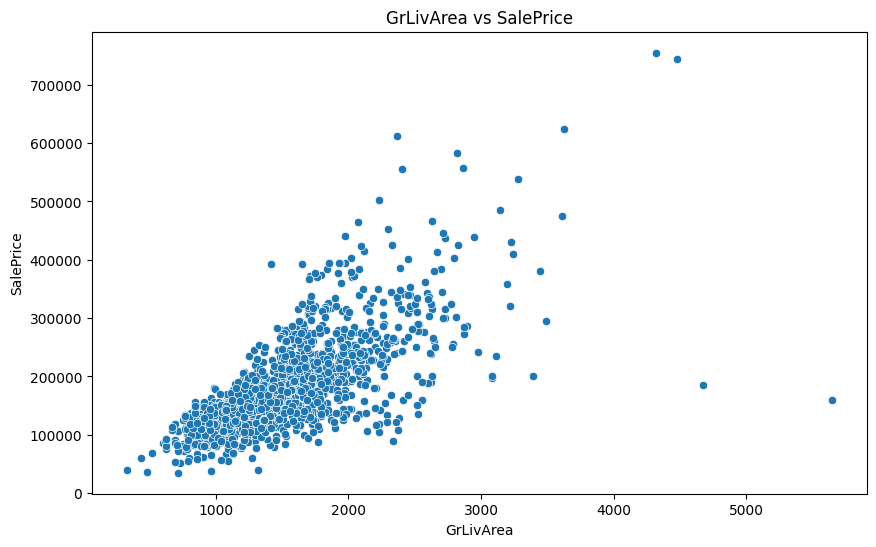

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=house['GrLivArea'], y=house['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# `GarageArea` dengan `SalePrice`

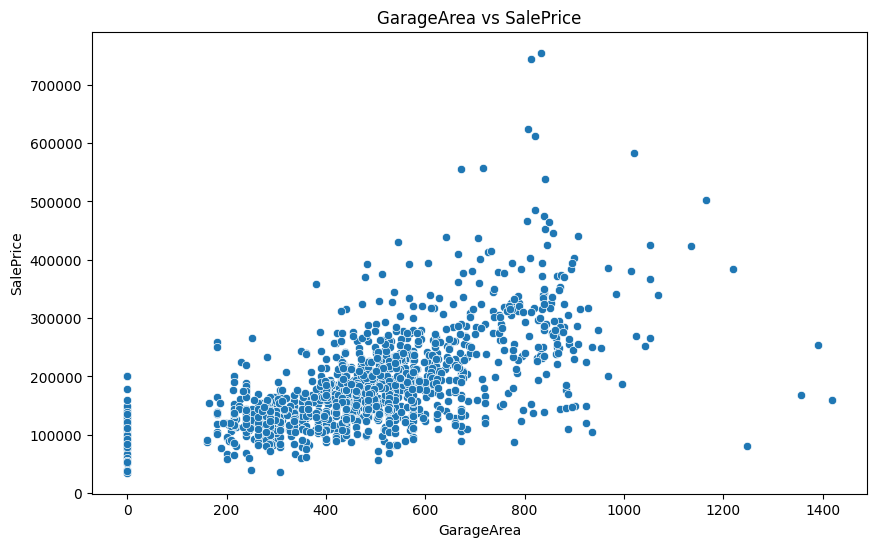

In [59]:
# Scatter Plot: GarageArea dengan SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=house['GarageArea'], y=house['SalePrice'])
plt.title('GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

[Analisis Visual]

Dari kedua grafik scatter plot yang ditampilkan, terlihat adanya korelasi positif yang cukup kuat antara

**GrLivArea (luas area di atas permukaan tanah) dan SalePrice (harga jual)**: Semakin besar luas area sebuah rumah, cenderung semakin tinggi harga jualnya. Ini menunjukkan bahwa ukuran rumah memiliki pengaruh signifikan terhadap harga jual.
GarageArea (luas garasi) dan SalePrice: Sama seperti GrLivArea, GarageArea juga menunjukkan korelasi positif dengan SalePrice. Ini mengindikasikan bahwa keberadaan dan ukuran garasi turut mempengaruhi harga jual sebuah rumah.
Hipotesis yang dapat diajukan:

**Hipotesis**

H1: Terdapat hubungan positif yang signifikan antara luas area di atas permukaan tanah (GrLivArea) dan harga jual rumah (SalePrice). Semakin besar GrLivArea, semakin tinggi SalePrice.

H2: Terdapat hubungan positif yang signifikan antara luas garasi (GarageArea) dan harga jual rumah (SalePrice). Semakin besar GarageArea, semakin tinggi SalePrice.*